In [51]:
from pandas_datareader import data as pdr
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import time
from pykrx import stock


import matplotlib
from matplotlib import font_manager, rc     # matplotlib 한글 폰트 출력코드
import platform


matplotlib.rcParams['axes.unicode_minus'] = False   

In [52]:
def backtest(code, k, start):
    code = str(code)+".KS"
    df=pd.DataFrame()
    df = pdr.get_data_yahoo(code, start)
    df['변동폭'] = df['High']-df['Low']
    df['목표가'] = df['Open'] + df['변동폭'].shift(1)*k
    df['MA3_yes'] = df.Close.rolling(window=3).mean().shift(1)
    df['내일시가'] = df.Open.shift(-1)
    cond = ( df['High'] > df['목표가'] ) & ( df['목표가'] > df['MA3_yes'] )
    df.loc[cond,'수익률'] = df.loc[cond,'내일시가']/df.loc[cond,'목표가']-0.0032
    return df['수익률']

# 국내 주식 불러오기
codes = ['A204320', 'A028050', 'A035150', 'A011210', 'A131390', 'A006360', 'A005070', 'A005380', 'A001510', 'A001140', 'A068270', 'A004020', 'A032560', 'A200130', 'A039490',
 'A079430', 'A000990', 'A011790', 'A210980', 'A002840', 'A035510', 'A029460', 'A086280', 'A005940', 'A006800', 'A020760', 'A011760', 'A069260']
codes = [ code[1:] for code in codes ]

# 수익률 함수
returns = pd.DataFrame()
for code in codes:
    df = backtest(code,k=0.5,start='2021-12-01')
    returns[code] = df
    time.sleep(0.01)
returns.set_index(returns.index.strftime("%Y-%m-%d"),inplace=True)

# 수익률
returns_=pd.DataFrame()
returns_['min']= returns.min(axis=1)
returns_['mean']= returns.mean(axis=1)
returns_['median']= returns.median(axis=1)
returns_['max']= returns.max(axis=1)
returns_['count'] = returns.count(axis=1)
returns_['승패'] = returns_['mean'].map(lambda x:1 if x>1 else 0 )

In [53]:
kospi = pdr.get_data_yahoo( "^KS11",'2021-12-01' )
kospi['어제종가']=kospi.Close.shift(1)
kospi['수익률']=(kospi['Close']/kospi['어제종가'])
kospi.set_index(kospi.index.strftime("%Y-%m-%d"),inplace=True)
 # kospi수익률을 returns_함수에 합친다
returns_['코스피']=kospi['수익률']
returns_

,min,mean,median,max,count,승패,코스피
Date,,,,,,,
2021-12-01,NaN,NaN,NaN,NaN,0,0,NaN
2021-12-02,NaN,NaN,NaN,NaN,0,0,1.015708
2021-12-03,NaN,NaN,NaN,NaN,0,0,1.007830
2021-12-06,0.975241,0.999546,0.999027,1.022261,15,0,1.001657
2021-12-07,0.999750,1.021378,1.021854,1.047805,10,1,1.006212
...,...,...,...,...,...,...,...
2022-12-06,0.973791,0.973791,0.973791,0.973791,1,0,0.989187
2022-12-07,0.977932,0.997769,0.999759,1.011875,5,0,0.995675
2022-12-08,0.996800,0.997125,0.997125,0.997450,2,0,0.995077


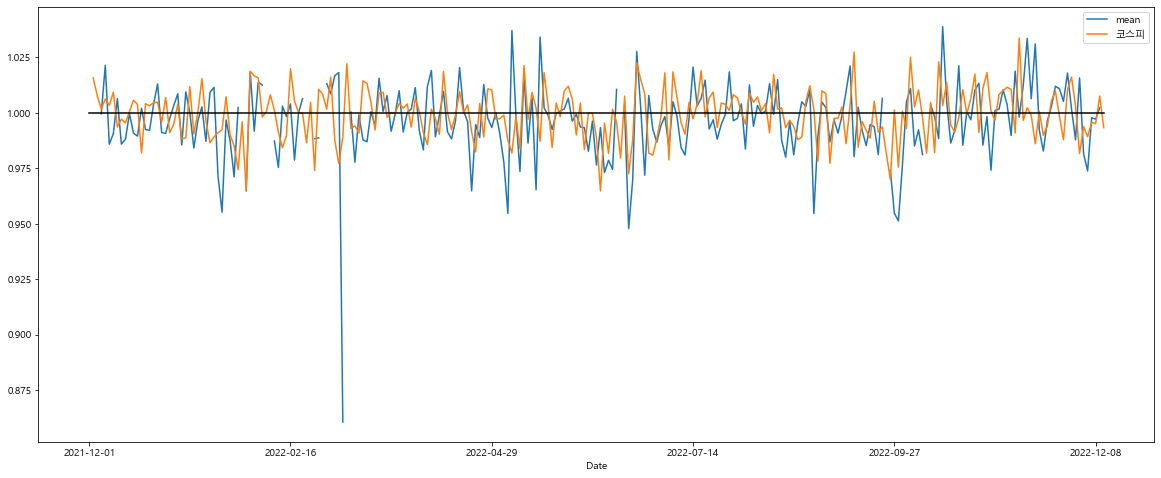

In [56]:
fig, ax = plt.subplots(figsize=(20,8))            #그래프
returns_[['mean','코스피']].plot(ax=ax)
ax.plot(np.ones(returns_.shape[0]),color='black')